In [11]:
import mysql.connector
import random as r
import numpy as np

mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "Figurinhas_do_Ben_10"
)
mycursor = mydb.cursor()

In [12]:
# Cria tabela posses no banco 'Figurinhas_do_Ben_10'
mycursor.execute(f"""create table posses (
id_pessoa int not null primary key,
nome_pessoa varchar(255),
email_pessoa varchar(255)
);""")
mydb.commit()

In [14]:
#Número de itens na tabela 'figurinhas'
mycursor.execute(f"select count(*) from figurinhas")
num = mycursor.fetchall()
num = int(num[0][0])

ProgrammingError: 1146 (42S02): Table 'figurinhas_do_ben_10.figurinhas' doesn't exist

In [ ]:
#Adiciona as colunas restantes da tabela 'figurinhas'
for i in range(num):

    mycursor.execute(f"alter table posses add figurinha_{i+1} int;")
    mydb.commit()
    # Aqui Marcello UwU
    # mycursor.execute(f"alter table posses add constraint fk_fig_{i+1} foreign key (figurinha_{i+1}) references figurinhas(id_figurinha);")
    # mydb.commit()

In [ ]:
nome = ["Miguel", "Sophia",	"Davi",	"Alice", "Arthur",	"Julia", "Pedro", "Isabella", "Gabriel", "Manuela",	"Bernardo",	"Laura", "Lucas", "Luiza", "Matheus", "Valentina", "Rafael", "Giovanna","Heitor", "Maria" ,"Eduarda","Enzo","Helena", "Guilherme","Beatriz","Nicolas","Maria Luiza","Lorenzo","Lara","Gustavo", "Mariana",	"Felipe", "Nicole",	"Samuel", "Rafaela", "João Pedro", "Heloísa", "Daniel",	"Isadora",	"Vitor"	,"Lívia", "Leonardo", "Maria Clara", "Henrique", "Ana Clara", "Theo", "Lorena", "Murilo", "Gabriela", "Eduardo", "Yasmin", "Pedro", "Isabelly",	"Pietro", "Play Osu Game", "Jorge Gameplays555", "Piton", "Onichan", "Henrique"]

In [ ]:
sobrenome = [ "Almeida", "Azevedo", "Braga", "Barros", "Bahiense", "Campos", "Cardoso", "Correia", "Castro", "Costa", "Fontes" , "Guimarães" , "Magalhães" , "Macedo", "Matos", "Pedreira", "Queirós", "Ribeiro", "Rocha", "Siqueira", "Serra", "Souza", "Teixeira", "Valle"]

In [ ]:
email = ["@gmail.com", "@hotmail.com", "@outlook.com", "@protonmail.com"]

In [ ]:
#Insere os valores das pessoas na tabela 'posses'
for i in range(1, 51):

    n = r.choice(nome)
    s = r.choice(sobrenome)

    # print(f"values ({i}, '{n} {s}', '{n.lower()}.{s.lower()}{r.choice(email)}');")

    mycursor.execute(f"""insert into posses(id_pessoa, nome_pessoa, email_pessoa)
    values ({i}, '{n} {s}', '{n.lower()}.{s.lower()}{r.choice(email)}');""")
    mydb.commit()

In [ ]:
#Cria um array de pesos de 100 a 1
pesos = []
for i in range(100, 0, -1):
    pesos.append(i)

In [ ]:
#Insere os valores das colunas figurinhas restantes usandos os pesos
for i in range(num):
    for p in range(50):
        quatd = np.random.choice(r.randint(1, 100), 1, pesos)[0]

        # print(f"update posses set figurinha_{i+1} = {quatd} where id_pessoa = {p+1};")

        mycursor.execute(f"update posses set figurinha_{i+1} = {quatd} where id_pessoa = {p+1};")
        mydb.commit()

IntegrityError: 1452 (23000): Cannot add or update a child row: a foreign key constraint fails (`figurinhas_do_ben_10`.`posses`, CONSTRAINT `fk_fig_1` FOREIGN KEY (`figurinha_1`) REFERENCES `figurinhas` (`id_figurinha`))

In [ ]:
import seaborn as sns

In [ ]:
f1 = []
for i in range(num):
    mycursor.execute(f"select figurinha_{i+1} from posses")
    f0 = mycursor.fetchall()

    for i in f0:
        f1.append(i[0])

len(f1)

1500

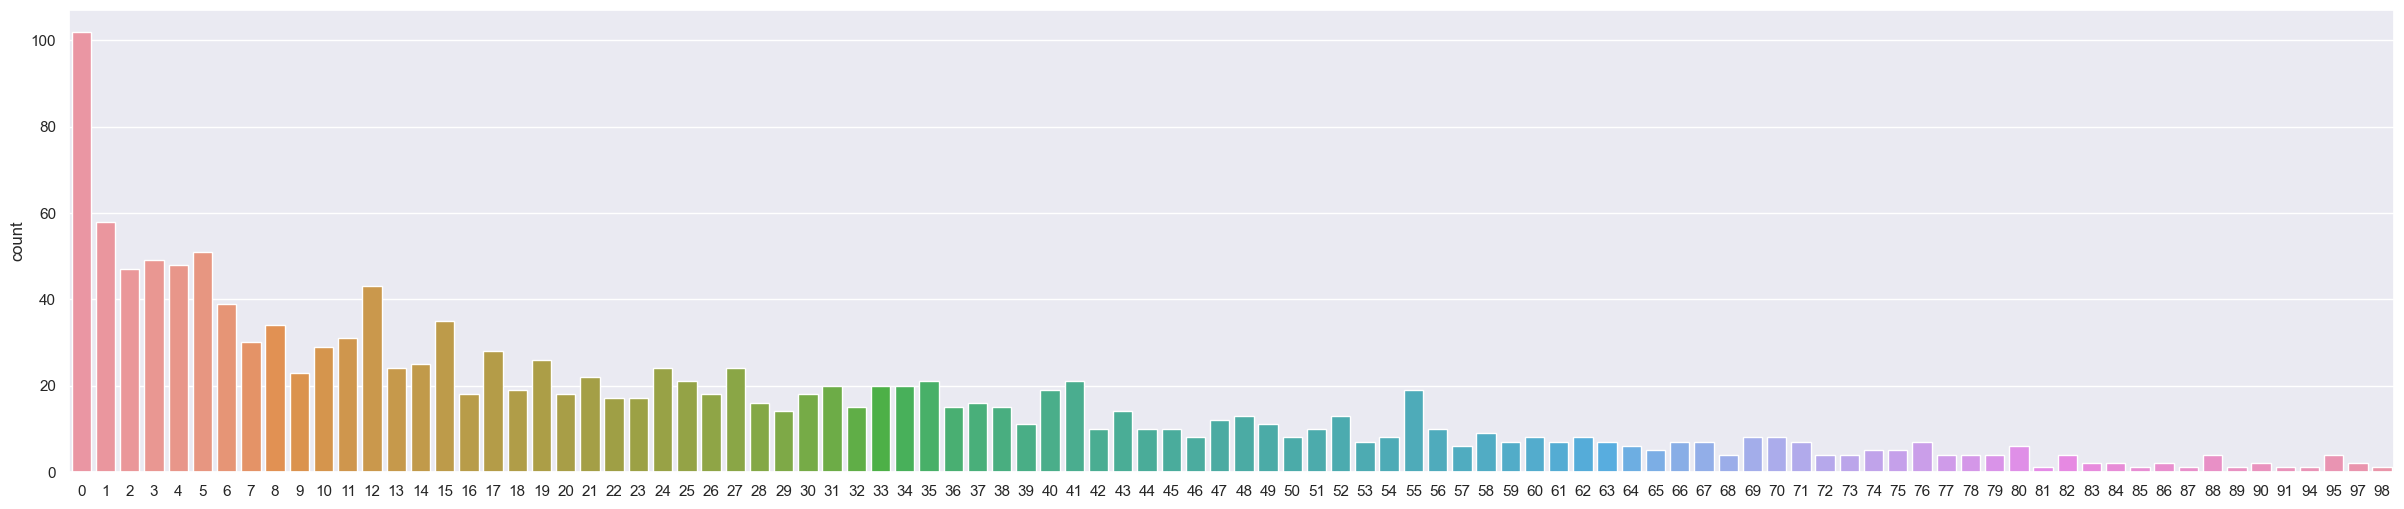

In [ ]:
sns.set(rc={'figure.figsize':(30,6)})
sns.countplot(x=f1);